In [ ]:
#Primera versión de todo el código junto completo

In [1]:
# Import general
import pandas as pd
import numpy as np
import array

# Import para mapa
from matplotlib import pyplot
from matplotlib import colors
import pickle

# Import para clases
from abc import ABC

# Import para generar ruta
import copy

# Import para generar pedido
import random

In [2]:
# Clases

class Robot(ABC):
    def __init__(self, ID: int, vel: float, pedidos: int, ruta):
        self._ID = ID  # ID del robot
        self._vel: float = vel  # Velocidad del robot
        self._pos = 0  # Posición en matriz array, es un vector
        self._pedidos: int = pedidos  # Número de pedidos máximos del robot
        self._ruta = ruta  # Array de Arrays
        self._vol = 0.0  # Volumen máximo de capacidad
        self._pesomax = 0.0  # Peso máximo de capacidad

        self._proceso: int = 0  # Proceso que se encuentra el robot
        # 0: espera, 1: movimiento, 2: entrega

        self._dist: float = 0.0  # Distancia recorrida por el robot
        self._inter: int = 0  # Intersecciones entre robots encontradas
        self._tiempoespera: float = 0.0  # Tiempo del robot esperando

    def get_ID(self) -> int:
        return self._ID

    def set_ID(self, ID: int):
        self._ID = ID

    def get_vel(self) -> float:
        return self._vel

    def set_vel(self, vel: float):
        if vel > 0:
            self._vel = vel

    def get_pos(self):
        return self._pos

    def set_pos(self, pos):
        self._pos = pos

    def get_pedidos(self) -> int:
        return self._pedidos

    def set_pedidos(self, pedidos: int):
        if pedidos == 6 or pedidos == 12:
            self._pedidos = pedidos

    def get_vol(self) -> float:
        return self._vol

    def set_vol(self, vol: float):
        if vol > 0:
            self._vol = vol

    def get_pesomax(self) -> float:
        return self._pesomax

    def set_pesomax(self, pesomax: float):
        if pesomax > 0:
            self._pesomax = pesomax 

    def get_proceso(self) -> int:
        return self._proceso

    def set_proceso(self, proceso: int):
        if proceso >= 0 and proceso <= 3:
            self._proceso = proceso

    def get_ruta(self) -> array.array:
        return self._ruta

    def set_ruta(self, ruta: array.array):
        self._ruta = ruta

    def get_dist(self) -> float:
        return self._dist

    def set_dist(self, dist: float):
        if dist > 0:
            self._dist = dist

    def get_inter(self) -> int:
        return self._inter

    def set_inter(self, inter: int):
        if inter > 0:
            self._inter = inter

    def get_tiempoespera(self) -> float:
        return self._tiempoespera

    def set_tiempoespera(self, tiempoespera: float):
        if tiempoespera > 0:
            self._tiempoespera = tiempoespera


class Humano(ABC):
    def __init__(self, ID: int, vel: float, picktime: float):
        self._ID = ID  # ID del humano
        self._pos: float = 0.0  # Posición del humano en matriz
        self._vel: float = 0.0  # Velocidad del humano
        self._picktime: float = 15.0  # Tiempo que tarda en hacer el pick

        self._proceso: int = 0  # Proceso en el que está el humano
        # 0: parado, 1: pedido, 3: picking, 4: regreso

        self._modo: str = "espera"  # Modo en el que está

    def get_ID(self) -> int:
        return self._ID

    def set_ID(self, ID: int):
        self._ID = ID

    def get_vel(self) -> float:
        return self._vel

    def set_vel(self, vel: float):
        if vel > 0:
            self._vel = vel

    def get_pos(self):
        return self._pos

    def set_pos(self, pos):
        self._pos = pos

    def get_picktime(self) -> float:
        return self._picktime

    def set_picktime(self, picktime: float):
        if picktime > 0:
            self._picktime = picktime

    def get_proceso(self) -> int:
        return self._proceso

    def set_proceso(self, proceso: int):
        if proceso >= 0 and proceso <= 4:
            self._proceso = proceso

    def get_modo(self) -> str:
        return self._modo

    def set_modo(self, modo: str):
        self._modo = modo

    


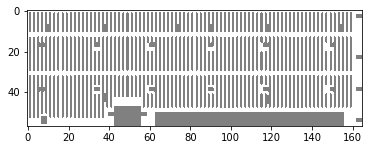

In [3]:
# Mapa Layout SPF

map_SPF = np.ones((57, 165), dtype=int)

for i in range(map_SPF.shape[1]):
    if (i % 2) == 0:
        map_SPF[:, i] = 0

map_SPF[0, :] = 0  # Fila 0 vacia
map_SPF[11:13, :] = 0  # Fila gruesa vacia
map_SPF[30:32, :] = 0  # Fila gruesa vacia
map_SPF[:, 160:165] = 0  # Columna gruesa final vacia
map_SPF[53:57, 0:38] = 0  # Zona inferior izquierda vacia
map_SPF[48:57, 38:42] = 0  #
map_SPF[43:47, 42:57] = 0  #
map_SPF[47:57, 43:55] = 1  # Hueco ocupado "exterior"
map_SPF[48:57, 56:63] = 0  #
map_SPF[48:50, 63:156] = 0  # Filas que separan la zona de recogida vacias
map_SPF[48:57, 156:164] = 0  #
map_SPF[50:57, 63:156] = 1  # Zona de recogida ocupada
map_SPF[51, 7:10] = 0  # Hueco encima de una escalera
# Huecos intercalados:
map_SPF[16:20, 32:37] = 0  # Hueco a
map_SPF[16:20, 58:63] = 0  # Hueco b
map_SPF[16:20, 88:93] = 0  # Hueco e
map_SPF[16:20, 114:119] = 0  # Hueco g
map_SPF[16:20, 146:151] = 0  # Hueco i
map_SPF[37:41, 32:37] = 0  # Hueco d
map_SPF[37:41, 58:63] = 0  # Hueco c
map_SPF[37:41, 88:93] = 0  # Hueco f
map_SPF[37:41, 114:119] = 0  # Hueco h
map_SPF[37:41, 146:151] = 0  # Hueco j
# Escaleras:
map_SPF[7:11, 10:12] = 1  #
map_SPF[7:11, 38:40] = 1  #
map_SPF[7:11, 74:76] = 1  #
map_SPF[7:11, 90:92] = 1  #
map_SPF[7:11, 118:120] = 1  #
map_SPF[7:11, 154:156] = 1  #
map_SPF[52:56, 7:10] = 1  #
map_SPF[41:45, 38:40] = 1  #
map_SPF[42:46, 118] = 1  #
# Cuadrados azules derecha:
map_SPF[2:4, 162:165] = 1  #
map_SPF[22:24, 162:165] = 1  #
map_SPF[38:40, 162:165] = 1  #
map_SPF[53:55, 162:165] = 1  #
# Cuadrados azules abajo:
map_SPF[50:52, 40:43] = 1  #
map_SPF[50:52, 56:59] = 1  #
# Columnas verdes:
map_SPF[16:18, 6:9] = 1  #
map_SPF[16:18, 33:36] = 1  #
map_SPF[16:18, 60:63] = 1  #
map_SPF[16:18, 89:92] = 1  #
map_SPF[16:18, 116:119] = 1  #
map_SPF[16:18, 149:152] = 1  #
map_SPF[38:40, 6:9] = 1  #
map_SPF[38:40, 33:36] = 1  #
map_SPF[38:40, 60:63] = 1  #
map_SPF[38:40, 89:92] = 1  #
map_SPF[38:40, 116:119] = 1  #
map_SPF[38:40, 149:152] = 1  #


list_SPF = map_SPF.tolist()


# Escritura en modo binario, vacía el fichero si existe
fichero = open("mapaTarancon_P1.pckl", "wb")

# Escribe la colección en el fichero
pickle.dump(list_SPF, fichero)

fichero.close()

"""
# Lectura en modo binario
fichero = open("mapaTarancon_P1.pckl", "rb")

# Cargamos los datos del fichero
lista_fichero = pickle.load(fichero)

fichero.close()
"""

colormap = colors.ListedColormap(["white", "grey"])
# entregando este problema a
pyplot.imshow(list_SPF, cmap=colormap)
pyplot.show()

In [4]:
# Función Generar Pedido

def generar_pedido():

    y = 0

    # y es el valor que establece si el vector es correcto o no 
    # 0: incorrecto, 1: Correcto

    while y == 0:

        num1 = random.randint(1, 55) # Valor random del eje x
        num2 = random.randint(1, 158) # Valor random del eje y

        x = 0 
        
        """x es el número de "0" que hay en las 9 posiciones contiguas a la
        selección. Si hay 4 o menos "0", la selección será válida
        (ya que no está en los pasillos). Si hay más de 4 "0" significa que
        está en un pasillo u otro espacio en el que no hay estantería"""

        # Comprueba las 9 casillas contiguas en las que hay "0"

        if map_SPF[num1 + 1, num2] == 0:
            x = x + 1

        if map_SPF[num1 + 1, num2 + 1] == 0:
            x = x + 1

        if map_SPF[num1, num2 + 1] == 0:
            x = x + 1

        if map_SPF[num1 - 1, num2 + 1] == 0:
            x = x + 1

        if map_SPF[num1 - 1, num2] == 0:
            x = x + 1

        if map_SPF[num1 - 1, num2 - 1] == 0:
            x = x + 1

        if map_SPF[num1, num2 - 1] == 0:
            x = x + 1

        # Comprueba que la posición está libre y hay 4 o menos casillas con "0"
        if x <= 4 and map_SPF[num1, num2] == 0:
            y = 1
            vector = np.array([num1, num2])

        # Caso en el que la selección no es válida
        if x > 4 or map_SPF[num1, num2] == 1:
            y = 0

        print("Vector [",num1, ",",num2,"]")
        print("Valor Matriz: ", map_SPF[num1, num2])

    return num1, num2

In [5]:
# Funcion Calcular Ruta
# (i, j): origin
# (r, c): destination
path = [] # solo hace falta declararla 1 vez
all_paths = [] # declararla siempre antes de llamar a la funcion

def find_paths(matrix, path, i, j, r, c):

    '''
    Esta funcion recibe:
        matrix: matriz que contiene el mapa (0 por donde puede ir y 1 por donde no)
        path: vector vacio que rellenar con la ruta
        (i, j): coordenadas de origen
        (r, c): coordenadas de destino
    Devuelve:
        all_paths: vector que contiene las variantes para una misma ruta (vector de vectores)
    
    CADA VEZ QUE SE LLAMA A LA FUNCION HAY QUE DECLARAR all_paths = []
    '''

    if matrix[i][j] == 1:
        return print('Error in origin')
    elif matrix[r][c] == 1:
        return print('Error in destination')
    
    path.append((i, j))

    # if destination is reached print it
    if i == r and j == c:
        all_paths.append(copy.copy(path))
        print(path)
        path.pop()
        return all_paths
    
    # move down
    if i+1 <= r and matrix[i+1][j] == 0:  
        find_paths(matrix,path,i+1,j,r,c)
    
    # move right
    if j+1 <= c and matrix[i][j+1] == 0:
        find_paths(matrix,path,i,j+1,r,c)

    # move up
    if r <= i-1 and matrix[i-1][j] == 0:
        find_paths(matrix,path,i-1,j,r,c)
    
    # move left
    if c <= j-1 and matrix[i][j-1] == 0:
        find_paths(matrix,path,i,j-1,r,c)

    # if none of the above is explorable or invalid index: backtrack
    path.pop()


In [6]:
# Función Comprobar Ruta

def ComprobarRuta(all_paths, pos_pedido):
    """
    La idea es que reciba una ruta en forma de lista con coordenadas.
    Se sabe que la velocidad del robot es 0.9 m/s y se ha considerado que cada casilla mide 1.3X1.3 m^2.
    Así, se podrá saber, por tiempo, cuándo pasa el robot de una coordenada a otra, liberando las casillas.

    De momento, se considera que la ruta que se recibe ocupa todas las casillas en el momento de la comprobación.
    """
    ruta = all_paths

    for indice, coordenada in enumerate(ruta):
        # Comprobar que la ruta es factible -> que cada coordenada es un 0 en la matriz
        x = coordenada[0]
        y = coordenada[1]
        if map_SPF[x, y] != 0:
            print("Error. La ruta no es factible.")
            # Volver a llamar a la función de calcular, indicando por qué coordenadas no puede pasar.
            break
        else:
            index_ruta = indice
            print("Coordenada correcta.")

    if (index_ruta + 1) == len(ruta):
        # Significa que toda la ruta es válida. Se ordena al robot que la ejecute.
        for coordenada in ruta:
            x = coordenada[0]
            y = coordenada[1]
            map_SPF[x, y] = 2  # El robot ocupa las coordenadas de la ruta
            # Descomentar lo siguiente para guardar de verdad el nuevo plano en el fichero:
            # list_SPF = map_SPF.tolist()
            # Escritura en modo binario, vacía el fichero si existe
            # fichero = open("mapaTarancon_P1.pckl", "wb")
            # Escribe la colección en el fichero
            # pickle.dump(list_SPF, fichero)
            # fichero.close()


In [7]:
# Función Recopilar

"""Script para guardar todos los datos deseados:

- Tiempos del robot:
    - Journey (Llegada)
    - Waiting (Espera)
    - Hand Picking (Parada)
- Ruta del robot
- Destino
- Velocidad (para comprobar que son 0,9s)
- Número de Totes (6 o 12)
- ID del robot
- Número de artículos recogidos
- Número de pedidos completados
"""

"""
import string
from typing import List
"""

"""
https://stackabuse.com/reading-and-writing-csv-files-in-python-with-pandas/
https://www.statology.org/pandas-to-csv-append/
"""
import pandas as pd


def create_data_CSV(
    Journey,
    Waiting,
    HandPicking,
    Route,
    Destination,
    Speed,
    NumTotes,
    ID,
    PickedItems,
    CompletedOrders,
):

    """This function creates a NEW CSV with the given data"""

    colum_names = [
        "Journey Time",
        "Waiting Time",
        "Hand Picking Time",
        "Route",
        "Destination",
        "Speed",
        "Num Totes",
        "ID",
        "Picked Items",
        "Completed Orders",
    ]

    dataArray = [
        Journey,
        Waiting,
        HandPicking,
        Route,
        Destination,
        Speed,
        NumTotes,
        ID,
        PickedItems,
        CompletedOrders,
    ]

    data = pd.DataFrame(
        [dataArray],
        columns=colum_names,
    )
    data.to_csv(
        # "D:\\ICAI\\CICLAB\\CICLAB ID Logistics\\data.csv",
        "data.csv",
        mode="w",
        index=False,
        na_rep="Unknown",
    )


def update_data_CSV(
    Journey,
    Waiting,
    HandPicking,
    Route,
    Destination,
    Speed,
    NumTotes,
    ID,
    PickedItems,
    CompletedOrders,
):

    """This function UPDATES the existing CSV with the given data"""

    dataArrayforUpdate = [
        Journey,
        Waiting,
        HandPicking,
        Route,
        Destination,
        Speed,
        NumTotes,
        ID,
        PickedItems,
        CompletedOrders,
    ]

    dataUpdate = pd.DataFrame([dataArrayforUpdate])
    dataUpdate.to_csv(
        # "D:\\ICAI\\CICLAB\\CICLAB ID Logistics\\data.csv",
        "data.csv",
        mode="a",
        index=False,
        na_rep="Unknown",
        header=False,
    )

